In [74]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
%matplotlib inline

print(pd.__version__)
print(sns.__version__)
print(plt.__version__)
print(np.__version__)

1.4.4
0.12.0
3.5.3
1.23.3


In [75]:
train_df=pd.read_csv("./dataframes/train.csv")
test_df=pd.read_csv("./dataframes/test.csv")
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


### Pclass - Survived 관계

In [78]:
train_df[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Pcalss는 생존률과 관계가 있어보인다

### Sex - Survived 관계

In [79]:
train_df[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


- Sex는 생존률과 관계가 있어보인다.

### Age - Survived 관계

In [80]:
train_df[['Survived','Age']].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


- Age는 생존률과 관계가 없어보인다.

### SibSp - Survived 관계

In [81]:
train_df[['Survived','SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


- SibSp는 생존률과 관계가 있어보인다.

### Parch - Survived 관계

In [82]:
train_df[['Survived','Parch']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


- Parch는 생존률과 관계가 있어보인다.

### Fare- Survived 관계

/home/lss/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


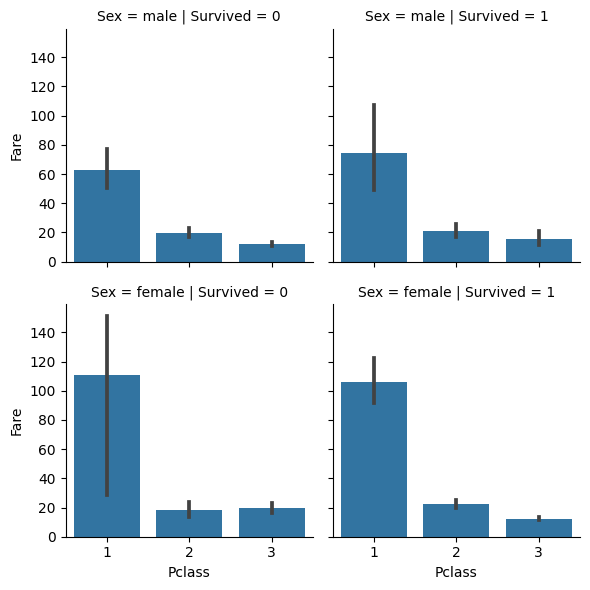

In [83]:
# train_df[['Survived','Fare']].groupby(['Fare']).mean()
sns.FacetGrid(train_df, row='Sex', col='Survived').map(sns.barplot,'Pclass','Fare')

- Fare가 높을 수록 생존률이 높다.
- Fare가 높을 수록 Pclass의 등급이 높을 수도 있다.

### Pclass 등급별 Fare

In [84]:
train_df[['Pclass','Fare']].groupby(['Pclass']).describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

### Embarked별 Pclass  

In [85]:
pd.crosstab(train_df['Pclass'],train_df['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


- 1,2,3등급의 선실 모두 S항에서의 승선인원이 가장 많았다.

### Embarked - Survived 

In [86]:
pd.crosstab(train_df['Embarked'],train_df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


- S항이 사망자가 가장 많았다.

### object 타입 데이터 통계

In [87]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Cabin, Ticket의 테이터 확인 필요함. 

In [88]:
# train_df.Ticket.unique()

# train_df[['Ticket','Pclass','Cabin','Embarked']]

# train_df['TicketNum'] = train_df.Ticket.str.extract('([0-9]*[0-9])', expand=False)
# test_df['TicketNum'] = test_df.Ticket.str.extract('([0-9]*[0-9])', expand=False)

train_df.Ticket.str.extract('([\d]*)', expand=False)

0            
1            
2            
3      113803
4      373450
        ...  
886    211536
887    112053
888          
889    111369
890    370376
Name: Ticket, Length: 891, dtype: object

In [89]:
train_df[train_df['Ticket'].str.contains('\d+')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Cabin은 [선실층+위치]의 번호로 보임
- Ticket은 숫자 여섯자리 이상표기된것들의 첫번 째자리가 Pclass로 보임

In [91]:
# train_df.isna().sum()
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Pclass는 결측값이 없음으로 티켓값은 무의미할 것을로 예상됨.

In [92]:
trdf = train_df.drop(['Ticket'],axis=1)
tedf = test_df.drop(['Ticket'],axis=1)

combine=[trdf,tedf]

- Ticket 피처 삭제. 
- Name 피처에서 경칭만 추출하여 피처생성
- Cabin 피처에서 선실 층 값으로 보이는 영문 대문자만 추출하여 피처 생성 

In [93]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
 11  Deep         91 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


- Name, Cabin,PassengerId 칼럼도 삭제.

In [95]:
trdf = trdf.drop(['Name','Cabin','PassengerId'],axis=1)
tedf = tedf.drop(['Name','Cabin','PassengerId'],axis=1)

combine=[trdf,tedf]

In [96]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
 9   Deep      204 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [97]:
tedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     418 non-null    object 
 8   Deep      91 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [98]:
pd.crosstab(trdf['Title'],trdf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [99]:
trdf[['Age','Title']].groupby(['Title']).mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


- Master의 나이 평균값이 특이점을 보임.
- Mr, Mrs, Miss, Mater값으로 남성과 여성, 미혼여성, 어린아이로 분류

In [100]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [101]:
dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

### dataset 의 결측치 확인

In [102]:
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
Deep        687
dtype: int64
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Embarked      0
Title         0
Deep        327
dtype: int64


### Test 데이터 NaN열 검색

In [103]:
tedf[tedf['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep
152,3,male,60.5,0,0,NaN,S,Mr,NaN


In [104]:
trdf[['Fare','Pclass']].groupby(['Pclass']).describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

- 테스트 데이터프레임 Fare값은 3등급 중위값 8로 주입.

In [105]:
tedf['Fare'] = tedf['Fare'].fillna(8)

In [106]:
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
Deep        687
dtype: int64
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        327
dtype: int64


- Embarked 결측값확인

In [107]:
trdf[trdf['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep
61,1,1,female,38.0,0,0,80.0,NaN,Miss,B
829,1,1,female,62.0,0,0,80.0,NaN,Mrs,B


- Embarked 결측값은 가장 많은 사람이 승선한 S항 으로 주입

In [108]:
trdf['Embarked'] = trdf['Embarked'].fillna('S')

In [109]:
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        687
dtype: int64
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        327
dtype: int64


In [110]:
tedf[tedf['Age'].isnull()].describe()

,Pclass,Age,SibSp,Parch,Fare
count,86.000000,0.0,86.000000,86.000000,86.000000
mean,2.732558,NaN,0.313953,0.372093,15.017055
std,0.640302,NaN,0.973310,1.471666,14.184527
min,1.000000,NaN,0.000000,0.000000,0.000000
25%,3.000000,NaN,0.000000,0.000000,7.750000
50%,3.000000,NaN,0.000000,0.000000,7.972900
75%,3.000000,NaN,0.000000,0.000000,15.559400
max,3.000000,NaN,8.000000,9.000000,69.550000


In [111]:
trdf[trdf['Age'].isnull()].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


- Age 칼럼 NaN 값의 Pclass 평균값은 2.5인 것으로 볼때 3등급 평균나이를 주입

In [112]:
trdf[['Pclass','Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [113]:
trdf[trdf['Pclass']==3].Age.mean()

25.14061971830986

In [114]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(25)

In [115]:
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        687
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Deep        327
dtype: int64


In [116]:
trdf[['Deep','Fare']].groupby(['Deep']).mean()

,Fare
Deep,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


### 승선층과 요금 과의 관계

In [117]:
for dataset in combine:
    dataset['Deep'] = dataset['Deep'].replace(['C'],'B')
    dataset['Deep'] = dataset['Deep'].replace(['E'],'D')
    dataset['Deep'] = dataset['Deep'].replace(['G'],'F')
    dataset['Deep'] = dataset['Deep'].replace(['T'],'A')

In [118]:
trdf[['Deep','Fare']].groupby(['Deep']).mean()

,Fare
Deep,
A,39.366144
B,106.072642
D,51.721926
F,17.493135


In [119]:
trdf[['Deep','Fare']].groupby(['Deep']).describe()

Fare                                                              \
      count        mean        std   min       25%       50%        75%   
Deep                                                                      
A      16.0   39.366144  17.396398  0.00  30.92395  35.50000   50.12395   
B     106.0  106.072642  89.456231  0.00  51.60940  83.31665  135.63330   
D      65.0   51.721926  31.382305  8.05  26.28750  52.55420   76.72920   
F      17.0   17.493135  10.516550  7.65  10.46250  13.00000   26.00000   

                
           max  
Deep            
A      81.8583  
B     512.3292  
D     134.5000  
F      39.0000

- qcut으로 요금 8개 밴드구간 생성

In [120]:
trdf['FareBand'] = pd.qcut(trdf['Fare'],4)
trdf[['FareBand','Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [121]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Deep']='F'
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.45),'Deep']='A'
    dataset.loc[(dataset['Fare']>14.45) & (dataset['Fare']<=31.0),'Deep']='D'
    dataset.loc[(dataset['Fare']>31.0) & (dataset['Fare']<=512.33),'Deep']='B'

trdf=trdf.drop(['FareBand'],axis=1)
combin=[trdf,tedf]

trdf.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep
200,0,3,male,28.0,0,0,9.5000,S,Mr,A
492,0,1,male,55.0,0,0,30.5000,S,Mr,D
740,1,1,male,25.0,0,0,30.0000,S,Mr,D
227,0,3,male,20.5,0,0,7.2500,S,Mr,F
801,1,2,female,31.0,1,1,26.2500,S,Mrs,D
382,0,3,male,32.0,0,0,7.9250,S,Mr,A
441,0,3,male,20.0,0,0,9.5000,S,Mr,A
703,0,3,male,25.0,0,0,7.7417,Q,Mr,F
798,0,3,male,30.0,0,0,7.2292,C,Mr,F
170,0,1,male,61.0,0,0,33.5000,S,Mr,B


In [122]:
for dataset in combine:
    print(dataset.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Deep        0
FareBand    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Deep        0
dtype: int64


### 결측치 제거 완료

- SibSp, Parch를 결합하여 본인을 포함한 가족구성원 수로 변경.

In [123]:
for dataset in combin:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

trdf[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [124]:
for dataset in combin:
    dataset['Title'] = dataset['Title'].map({'Master':0,'Mr':1,'Mrs':2,'Miss':3}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)
    dataset['Deep'] = dataset['Deep'].map({'B':0,'D':1,'F':2,'A':3}).astype(int)


In [125]:
trdf.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep,FamilySize
292,0,2,0,36.0,0,0,12.8750,2,1,3,1
252,0,1,0,62.0,0,0,26.5500,0,1,1,1
525,0,3,0,40.5,0,0,7.7500,1,1,2,1
214,0,3,0,25.0,1,0,7.7500,1,1,2,2
481,0,2,0,25.0,0,0,0.0000,0,1,2,1
283,1,3,0,19.0,0,0,8.0500,0,1,3,1
163,0,3,0,17.0,0,0,8.6625,0,1,3,1
268,1,1,1,58.0,0,1,153.4625,0,2,0,2
82,1,3,1,25.0,0,0,7.7875,1,3,2,1
264,0,3,1,25.0,0,0,7.7500,1,3,2,1


In [126]:
tedf.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deep,FamilySize
179,1,1,64.0,0,2,83.1583,2,2,0,3
176,2,1,20.0,0,0,36.7500,0,3,0,1
229,2,0,36.0,0,0,13.0000,0,1,3,1
10,3,0,25.0,0,0,7.8958,0,1,2,1
98,3,1,20.0,0,0,7.8542,0,3,2,1
308,1,0,55.0,1,1,93.5000,0,1,0,3
213,2,1,60.0,1,0,26.0000,0,2,1,2
153,3,1,36.0,0,2,12.1833,0,2,3,3
52,2,1,20.0,2,1,23.0000,0,3,1,4
218,1,1,50.0,1,1,211.5000,2,2,0,3


In [56]:
X_trdf=trdf.drop('Survived',axis=1)
Y_trdf=trdf['Survived']
X_tedf=tedf.copy()
X_trdf.shape, Y_trdf.shape, X_tedf.shape

((891, 10), (891,), (418, 10))

## 로지스틱 레그레이션
## 렐루, 시그모이드

In [57]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_trdf,Y_trdf)
Y_pred=logreg.predict(X_tedf)
acc_log=round(logreg.score(X_trdf,Y_trdf)*100,2)
acc_log

/home/lss/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.04

### 서포트 벡터 머신

- 분류 알고리즘
- 이진데이터 분류시 최적 성능

In [58]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_trdf,Y_trdf)
Y_pred=svc.predict(X_tedf)
acc_svc=round(svc.score(X_trdf,Y_trdf)*100,2)
acc_svc

68.91

### k-NN 분류와 회귀

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_trdf,Y_trdf)
Y_pred=knn.predict(X_tedf)
acc_knn=round(knn.score(X_trdf,Y_trdf)*100,2)
acc_knn

81.59

## 나이브 베이지안

In [60]:
from sklearn.naive_bayes import GaussianNB 
gaussian=GaussianNB()
gaussian.fit(X_trdf,Y_trdf)
Y_pred=gaussian.predict(X_tedf)
acc_gaussian=round(gaussian.score(X_trdf,Y_trdf)*100,2)
acc_gaussian

78.9

## 퍼셉트론

In [62]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_trdf,Y_trdf)
Y_pred=perceptron.predict(X_tedf)
acc_perceptron=round(perceptron.score(X_trdf,Y_trdf)*100,2)
acc_perceptron

59.03

## LinearSVC

In [63]:
linear_svc=LinearSVC()
linear_svc.fit(X_trdf,Y_trdf)
Y_pred=linear_svc.predict(X_tedf)
acc_linear_svc=round(linear_svc.score(X_trdf,Y_trdf)*100,2)
acc_linear_svc

/home/lss/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


77.22

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [64]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_trdf,Y_trdf)
Y_pred=sgd.predict(X_tedf)
acc_sgd=round(sgd.score(X_trdf,Y_trdf)*100,2)
acc_sgd

76.66

## 결정트리(Decision Tree)

In [130]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_trdf,Y_trdf)
Y_pred=decision_tree.predict(X_tedf)
acc_decision_tree=round(decision_tree.score(X_trdf,Y_trdf)*100,2)
acc_decision_tree

98.09

## 랜덤 포레스트(Random Forest)

In [127]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_trdf,Y_trdf)
Y_pred=random_forest.predict(X_tedf)
acc_random_forest=round(random_forest.score(X_trdf,Y_trdf)*100,2)
acc_random_forest

98.09

## 모델 평가 순위

In [67]:
models=pd.DataFrame({
    'Model':['SVM',
             'KNN',
             'Logistic Regression',
             'Random Forest',
             'Naive Bayes',
             'Perceptron',
             'SGD',
             'L-SVC',
             'Decision Tree'],
    'Score':[
        acc_svc,
        acc_knn,
        acc_log,
        acc_random_forest,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_linear_svc,
        acc_decision_tree
    ]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.09
8,Decision Tree,98.09
2,Logistic Regression,82.04
1,KNN,81.59
4,Naive Bayes,78.90
7,L-SVC,77.22
6,SGD,76.66
0,SVM,68.91
5,Perceptron,59.03


In [131]:
submission=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [129]:
submission.to_csv('submission.csv',index=False)

In [ ]:
print("Before", train_df.shape, test_df.shape)

# pop, drop->axis
train_df=train_df.drop(["Ticket","PassengerId"],axis=1)
test_df=test_df.drop(["Ticket","PassengerId"],axis=1)

combine=[train_df,test_df]

print("After",train_df.shape, test_df.shape)

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())

In [ ]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())

In [ ]:
dataset[['Age','Title']].groupby(['Title']).mean()


In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())

In [ ]:
# train_df[['Fare','Pclass']].groupby(['Pclass']).describe()
train_df[['Ticket','Deep']].groupby(['Deep']).describe()

In [ ]:
test_df['Fare']=test_df['Fare'].fillna(8.0500)

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

In [ ]:
train_df[['Age','Title']].groupby(['Title']).mean()

In [ ]:
for dataset in combine:
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Mr')),'Age']=33
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Mrs')),'Age']=35
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Miss')),'Age']=21
    dataset.loc[(dataset.Age.isnull())&(dataset.equals('Master')),'Age']=4


In [ ]:
for dataset in combine:
    print(dataset.isna().sum())

In [ ]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].map({"Master":1,"Miss":2,"Mr":3,"Mrs":4})
train_df.Title

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())

In [ ]:
train_df=train_df.drop(['Name','Cabin'],axis=1)
test_df=test_df.drop(['Name','Cabin'],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

In [ ]:
train_df.info()

In [ ]:
# pd.crosstab(train_df['Deep'], train_df['Survived'])
dataset[['Deep','Fare']].groupby(['Deep']).mean()

In [ ]:
train_df[['Deep','Fare']].groupby(['Deep']).describe()

In [ ]:
train_df[['Deep','Parch']].groupby(['Deep']).describe()

In [ ]:
train_df[['Sex','Survived']].groupby(['Sex']).describe()

In [ ]:
train_df[['Embarked','Survived']].groupby(['Embarked']).describe()

In [ ]:
train_df.sample(5)

In [ ]:
dataset['Embarked']=dataset['Embarked'].fillna(1)

In [ ]:
for dataset in combine:
    dataset['Family'] = dataset['Parch']+dataset['SibSp']+1

In [ ]:
train_df[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [ ]:
train_df[['Deep','Fare']].groupby(['Deep']).describe()

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male':1,'female':2}).astype(int)

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'C':1,'Q':2,'S':3}).astype(int)

In [ ]:
for dataset in combine:
    dataset['Deep'] = dataset['Deep'] .map({ 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8 }).astype(int)

In [ ]:
train_df.info()

In [ ]:
train_df.isna().sum()

In [ ]:
test_df.isna().sum()

In [ ]:
test_df[test_df['Title'].isnull()]

In [ ]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean()
# train_df[train_df['Pclass']==3]

In [ ]:
test_df[test_df['Age'].isnull()]

In [ ]:
train_df[train_df['Age'].isnull()]

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())